In [184]:
from matplotlib import cm
import matplotlib
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from IPython.display import SVG
from collections import defaultdict


def generate_highlited_figure(edge_weights, edge_index, mol):

#    colors = ["white", "honeydew", "greenyellow"]
#     colors = ["white", "honeydew", "lawngreen", "chartreuse", "greenyellow"]
#     colors = ["white", "honeydew", "lawngreen", "chartreuse"]
#    colors = ["white", "azure", "lightcyan", "cyan", "aqua"]
#    colors = ["white","azure",'mediumturquoise','lightseagreen','red']
#    colors= ["white","honeydew",'olivedrab','chocolate','red']
#    colors = ['lightstellblue',"white",'black']
#     colors = ["white", "white", "white", "red", "black"]
    colors = ["white", "white", 'Tomato',"black"]
#     colors = ["white", "white", "gray", "black"]
#    colors = ["white","white","white",'black','black']
    # Colors to selecte from: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py 

    edge_index = edge_index.numpy()
    edge_weights = edge_weights.numpy()
    cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)
    hit_bonds = []
    # bond_cols = {}
    bond_cols = defaultdict(list)
#     viridis = cm.get_cmap('BuGn')

#     atom_cols = {max_ind: matplotlib.colors.to_rgb('red')}
    for i, (aid1, aid2) in enumerate(edge_index):
        bond = mol.GetBondBetweenAtoms(int(aid1),int(aid2))
        if bond is None: continue 
        bond_id = bond.GetIdx()
        hit_bonds.append(bond_id)
        intensity = float(edge_weights[i])
        bond_cols[bond_id] = max(intensity, bond_cols.get(bond_id, 0))

#         i = 0
#     for bond_id, intensity in bond_cols.items():
#         mol.GetBondWithIdx(bond_id).SetProp('bondNote', f'{intensity:.2f}') 
    for bond_id, intensity in bond_cols.items():
        mol.GetBondWithIdx(bond_id).SetProp('bondNote', f'{intensity:.2f}') 
    bond_cols = {k:  cmap1(v) for k, v in bond_cols.items()}
    hit_bonds = list(set(hit_bonds))

    d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
    dos = d.drawOptions()
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol
#                                         , highlightAtoms=[max_ind]
                                        # , highlightAtomColors=atom_cols
#                                         , highlightAtomColors= {max_ind: (.5, .5, 0.5)}
                                        , highlightBonds=hit_bonds 
                                        ,highlightBondColors=bond_cols)
    d.FinishDrawing()
    raw = d.GetDrawingText()

    return raw 

In [185]:
from torch import tensor
atts = tensor([[0.3292],
        [0.5472],
        [0.4365],
        [0.2629],
        [0.2751],
        [0.2817],
        [0.1421],
        [0.4498],
        [0.5190],
        [0.5190],
        [0.5377],
        [0.2141],
        [0.2141],
        [0.1986],
        [0.4528],
        [0.4079],
        [0.2817],
        [0.2751],
        [0.2310],
        [0.4810],
        [0.4810],
        [0.4623]])
edge_index = tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2],
        [3, 4],
        [4, 3],
        [4, 5],
        [4, 6],
        [4, 7],
        [5, 4],
        [6, 4],
        [7, 4],
        [0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [5, 5],
        [6, 6],
        [7, 7]])

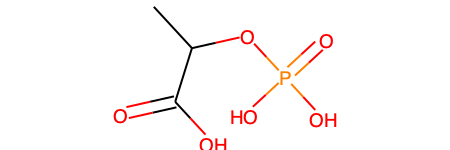

In [197]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CC(OP(=O)(O)O)C(=O)O')
mol

In [187]:
import numpy
out = generate_highlited_figure(atts, edge_index, mol)

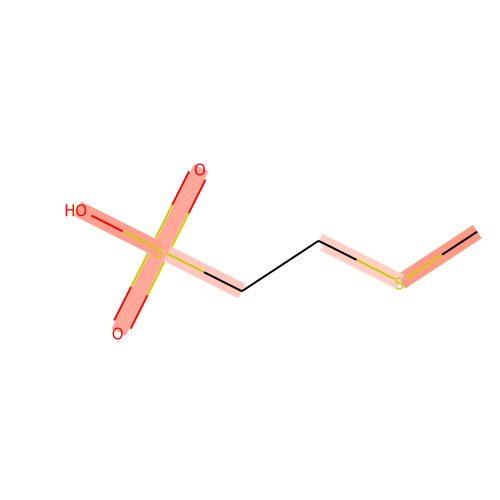

In [188]:
SVG(out)

In [189]:
with open('fig.svg', 'w') as f:
    f.write(out)